In [130]:
import keras
from keras.preprocessing.image import load_img, array_to_img, image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
import tensorflow as tf
import numpy as np


In [133]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

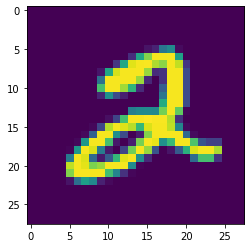

In [134]:
plt.imshow(X_train[5])

In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [114]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [115]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [116]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [126]:
model = None
model = Sequential()
model.add(Conv2D(32, (5,5), activation="relu", padding="same", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (5,5), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              3212288   
_________________________________________________________________
dense_22 (Dense)             (None, 10)              

In [127]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [128]:
model.load_weights("/content/cnn-model5.h5")

# or
# model.predict(X_train, y_train, epochs=30, validation_data=(X_test, y_test), shuffle=True)

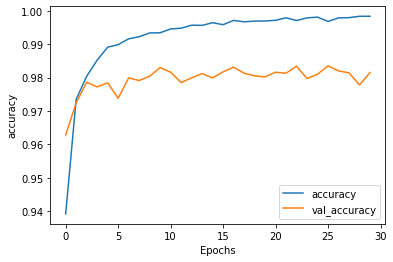

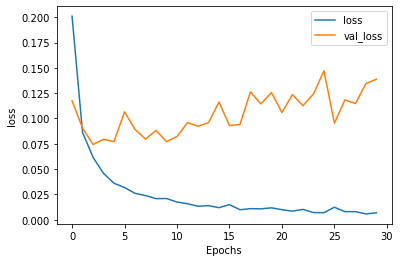

In [170]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [129]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.0268 - accuracy: 0.9930


[0.026782654225826263, 0.9929999709129333]

Preicted number =  3


(<matplotlib.image.AxesImage at 0x7faa7d7e0450>, 3)

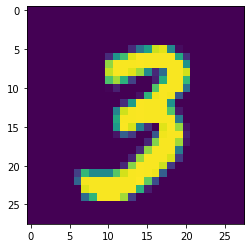

In [176]:
ind_v = 7374
prediction = model.predict(X_test[ind_v].reshape(1,28,28,1))
print("Preicted number = ", int(np.argmax(prediction)))
plt.imshow(X_test[ind_v]), y_test[ind_v]